In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

train.shape, test.shape

((891, 12), (418, 11))

In [9]:
# train.info()
# train.dtypes
# train.columns
# train.shape
# train.head()
# train.tail()
# train.describe()
# train.isnull() -> T/F
# train.isnull().sum() -> 총개수
# train.corr()(


# 수치형이아닌 오브젝트에 관한 범주형데이터 정보
# train.describe(include=['o'])

In [12]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Skoog, Mr. Wilhelm",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### pclass별 생존자 구하기 -> groupby

In [17]:
train.groupby(['Pclass'])
train.groupby(['Pclass']).count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [21]:
train.groupby(['SibSp'])
train.groupby(['SibSp']).count()
train.groupby(['SibSp']).mean()['Age']

SibSp
0    31.397558
1    30.089727
2    22.620000
3    13.916667
4     7.055556
5    10.200000
8          NaN
Name: Age, dtype: float64

In [27]:
# pclassabs 별 나이 연령대
train.groupby(['Pclass']).mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [34]:
train['Age'].isnull().sum()

177

In [32]:
train.shape

(891, 12)

In [36]:
# pclassabs 별 남녀 나이 연령대
train.groupby(['Pclass','Sex']).count()

PassengerId  Survived  Name  Age  SibSp  Parch  Ticket  Fare  \
Pclass Sex                                                                    
1      female           94        94    94   85     94     94      94    94   
       male            122       122   122  101    122    122     122   122   
2      female           76        76    76   74     76     76      76    76   
       male            108       108   108   99    108    108     108   108   
3      female          144       144   144  102    144    144     144   144   
       male            347       347   347  253    347    347     347   347   

               Cabin  Embarked  
Pclass Sex                      
1      female     81        92  
       male       95       122  
2      female     10        76  
       male        6       108  
3      female      6       144  
       male        6       347

In [41]:
train.groupby(['Pclass','Sex','Embarked']).count()

PassengerId  Survived  Name  Age  SibSp  Parch  \
Pclass Sex    Embarked                                                   
1      female C                  43        43    43   38     43     43   
              Q                   1         1     1    1      1      1   
              S                  48        48    48   44     48     48   
       male   C                  42        42    42   36     42     42   
              Q                   1         1     1    1      1      1   
              S                  79        79    79   64     79     79   
2      female C                   7         7     7    7      7      7   
              Q                   2         2     2    1      2      2   
              S                  67        67    67   66     67     67   
       male   C                  10        10    10    8     10     10   
              Q                   1         1     1    1      1      1   
              S                  97        97    97   90     97     97   
3      female C                  23        23    23   16     23     23   
              Q                  33        33    33   10     33     33   
              S                  88        88    88   76     88     88   
       male   C                  43        43    43   25     43     43   
              Q                  39        39    39   14     39     39   
              S                 265       265   265  214    265    265   

                        Ticket  Fare  Cabin  
Pclass Sex    Embarked                       
1      female C             43    43     35  
              Q              1     1      1  
              S             48    48     43  
       male   C             42    42     31  
              Q              1     1      1  
              S             79    79     63  
2      female C              7     7      1  
              Q              2     2      1  
              S             67    67      8  
       male   C             10    10      1  
              Q              1     1      0  
              S             97    97      5  
3      female C             23    23      1  
              Q             33    33      0  
              S             88    88      5  
       male   C             43    43      0  
              Q             39    39      1  
              S            265   265      5

In [44]:
train[['Age','Pclass','Sex','Embarked']].groupby(['Pclass','Sex','Embarked']).count()

Age
Pclass Sex    Embarked     
1      female C          38
              Q           1
              S          44
       male   C          36
              Q           1
              S          64
2      female C           7
              Q           1
              S          66
       male   C           8
              Q           1
              S          90
3      female C          16
              Q          10
              S          76
       male   C          25
              Q          14
              S         214

### sort values by

In [55]:
dat = train.groupby(['Pclass','Sex'], as_index=False).mean()
dat

,Pclass,Sex,PassengerId,Survived,Age,SibSp,Parch,Fare
0,1,female,469.212766,0.968085,34.611765,0.553191,0.457447,106.125798
1,1,male,455.729508,0.368852,41.281386,0.311475,0.278689,67.226127
2,2,female,443.105263,0.921053,28.722973,0.486842,0.605263,21.970121
3,2,male,447.962963,0.157407,30.740707,0.342593,0.222222,19.741782
4,3,female,399.729167,0.500000,21.750000,0.895833,0.798611,16.118810
5,3,male,455.515850,0.135447,26.507589,0.498559,0.224784,12.661633


In [54]:
dat.sort_values(by='Survived',ascending=False)

,Pclass,Sex,PassengerId,Survived,Age,SibSp,Parch,Fare
0,1,female,469.212766,0.968085,34.611765,0.553191,0.457447,106.125798
2,2,female,443.105263,0.921053,28.722973,0.486842,0.605263,21.970121
4,3,female,399.729167,0.500000,21.750000,0.895833,0.798611,16.118810
1,1,male,455.729508,0.368852,41.281386,0.311475,0.278689,67.226127
3,2,male,447.962963,0.157407,30.740707,0.342593,0.222222,19.741782
5,3,male,455.515850,0.135447,26.507589,0.498559,0.224784,12.661633


### 데이터 전처리

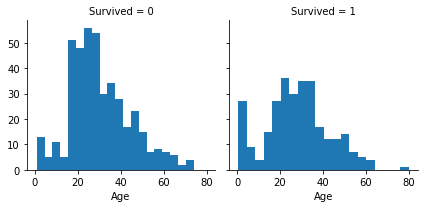

In [59]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

<Figure size 1080x1080 with 0 Axes>

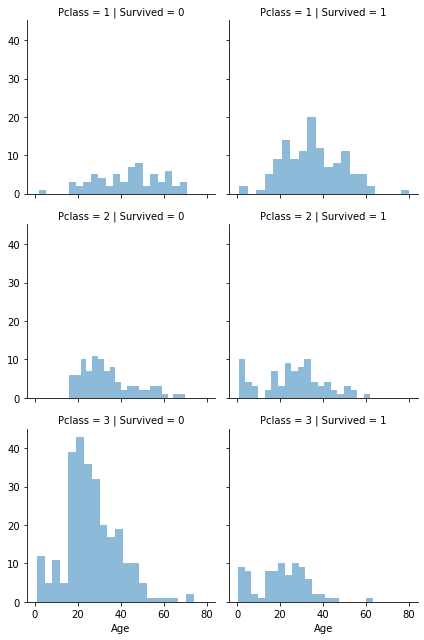

In [60]:
plt.figure(figsize=(15,15))
grid = sns.FacetGrid(train, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)

In [62]:
# train.drop([], axis=1)  0:행, 1:열
train_df=train.drop(['Ticket', 'Cabin'], axis=1)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [63]:
train_df=train_df.drop(['Name'], axis=1)
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


#### [].groupby([]).sum()
#### [].groupby([]).mean()
#### [].groupby([]).count()
#### pd.options.display.max_columns = 500

#### 문자열 처리
* [].str.strip()
* [].str.split()
* [].str.find().extract()

#### 자료형 변환
* [].astype({'col1':'int32'})
* dat['col1'] = dat['col1'].astype('int32')

#### 데이터 셋에 어떤 것이 있을까? 유일한 값들만 출력
* train['컬럼명'].unique()
* train['컬럼명'].value_counts()  #개수확인
* train_2 = train.copy()

#### 조건에 만족하는 행 선택
* train.loc['행','열']
* data_tmp = train.loc[dat['col1'] > 100, :]
* data_tmp = train[dat['col1'] > 100]

#### 인덱스값을 리셋
* tmp = train.rest_index(inplace=False)
* df.rest_index(inplace=True)

### 값을 정렬
* tmp = train.sort_values(by=['col1'], ascending=True)
* tmp = train.sort_index(by=['col1'], ascending=True)

### [].shape, [].head(), [].tail(), [].describe(), [].columns, [].info(), [].dtypes, [].isnull().sum()
### [].notnull().sum()
### [].groupby([]).sum(), [].groupby([]).mean(), [].groupby([]).count()
### pd.options.display.max_columns= 500
### 문자열 처리 
 * [].str.strip()
 * [].str.split()
 * [].str.find(), extract()..
    
### 자료형 변환
 * [].astype({"col1":"int32"})
 * dat['col1'] = dat['col1'].astype('int32')

### 데이터가 어떤 것이 있을까?
 * [데이터셋]['컬럼명'].unique()
    
### 데이터가 어떤 것이 있을까? 그리고 그것의 개수확인
 * [데이터셋]['컬럼명'].value_counts()
    
### 조건에 만족하는 행을 선택
 * [].loc[행, 열]
    * data_tmp = [].loc[ dat['col1'] > 50, :]
    * data_tmp = [][ dat['col1'] > 50]
  
### 인덱스 값을 리셋
 * tmp = [].reset_index(inplace=False)
 * df.reset_index(inplace=True)

### 값을 정렬
 * tmp = [].sort_values(by=['col1'], ascending=True)
 * tmp = [].sort_index(by=['col1'], ascending=True)